<a href="https://colab.research.google.com/github/Sowmya-Dadheech/Time_Series_Analysis/blob/main/TSA_EXP_7_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Vector Autoregression**

Vector AutoRegressive (VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other.

VAR is a bidirectional model.

In a bidirectional model, variables influence each other.

The VAR (1) model with two time series (Y1 and Y2):

Ŷ1,t = μ1 + ϕ11Y1,t-1 + ϕ12Y1,t-2 + ɛ1,t

Ŷ2,t = μ2 + ϕ21Y2,t-1 + ϕ22Y2,t-2 + ɛ2,t

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/ice_cream_vs_heater.csv', parse_dates= True)

In [ ]:
df.head(10)

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21
5,2004-06,13,24
6,2004-07,13,27
7,2004-08,14,20
8,2004-09,15,18
9,2004-10,20,15


In [ ]:
df.shape

(198, 3)

In [ ]:
df.columns

Index(['Month', 'heater', 'ice cream'], dtype='object')

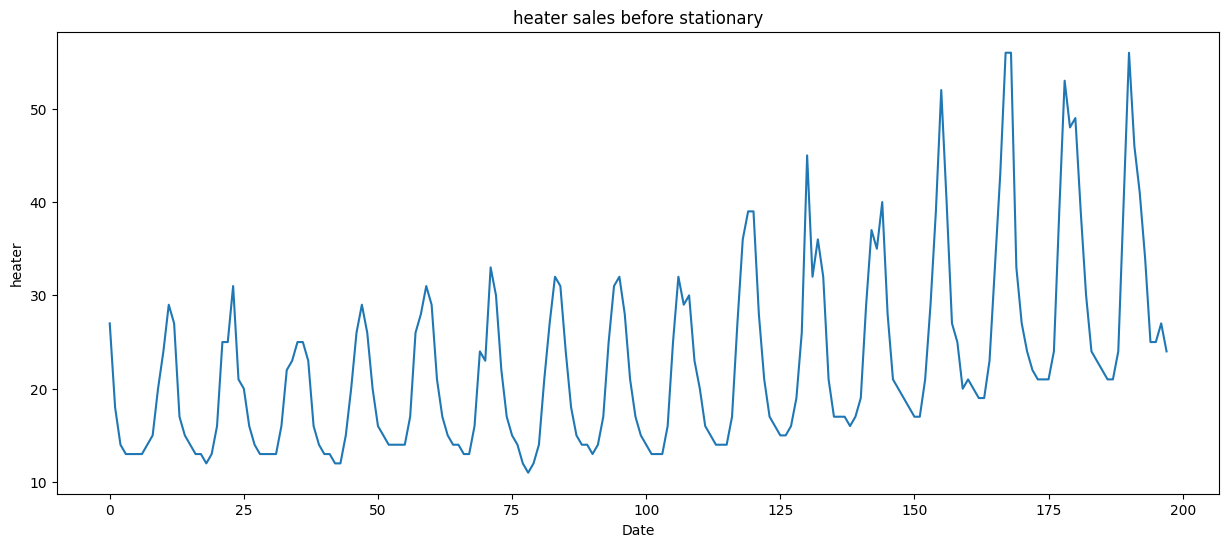

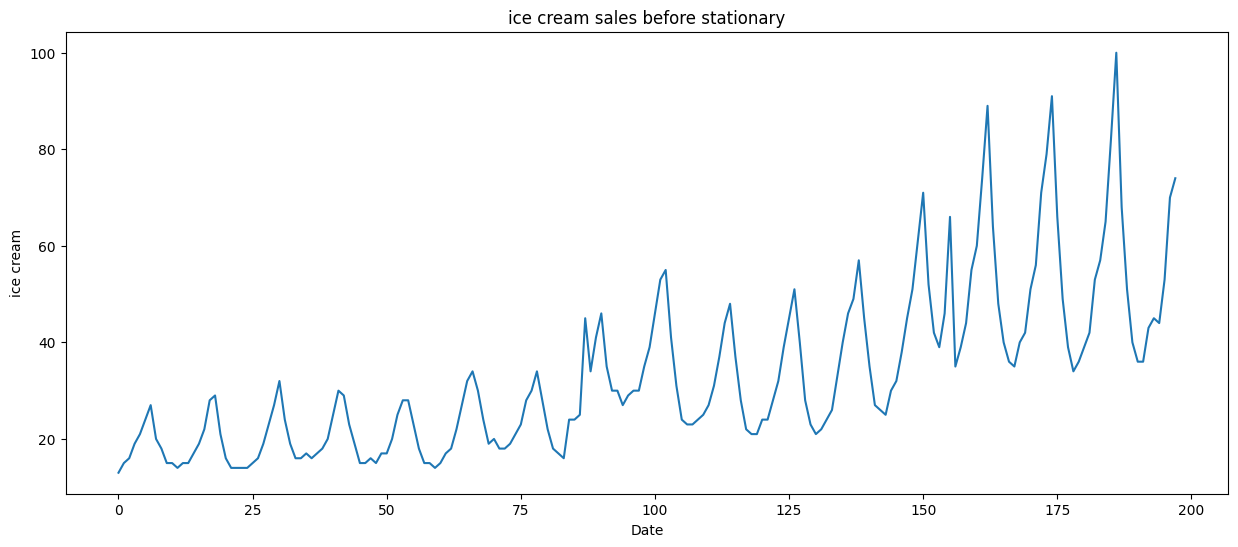

In [ ]:
for c in df[['heater', 'ice cream']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} sales before stationary")
    plt.show()

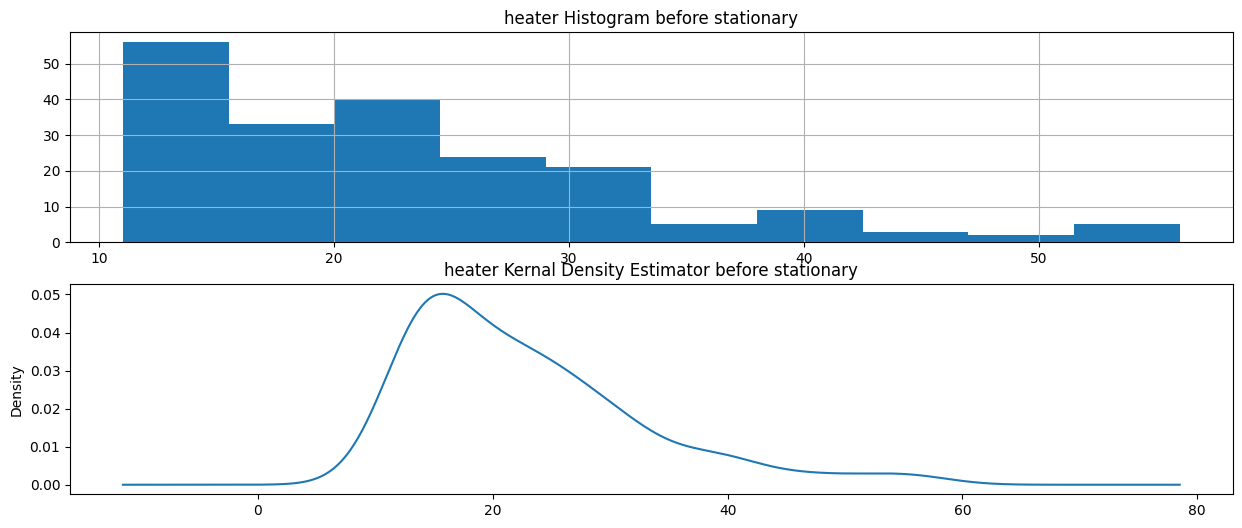

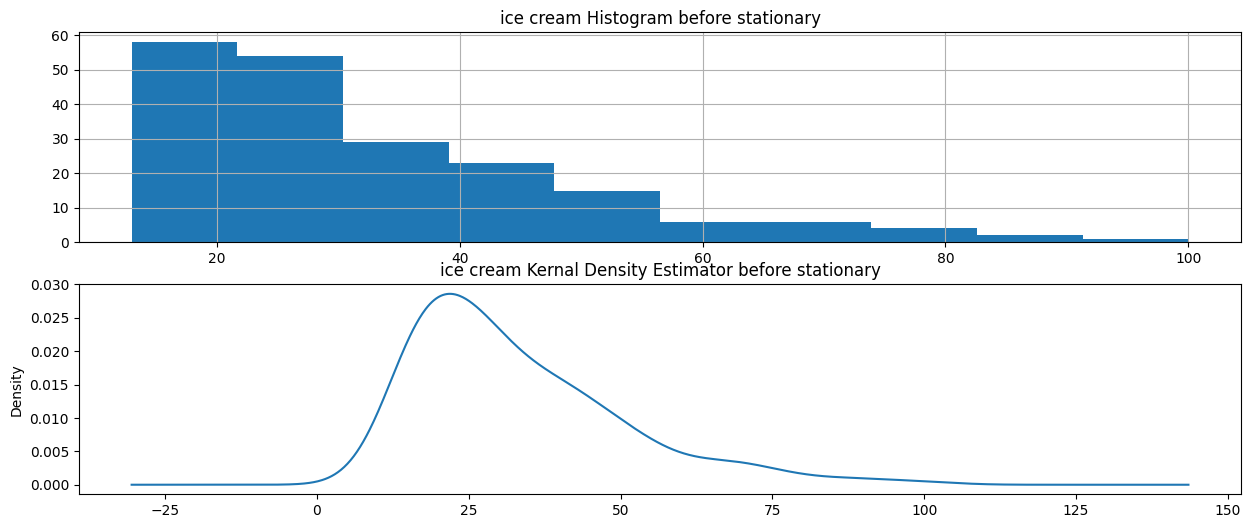

In [ ]:
for c in df[['heater', 'ice cream']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

Define a time-series evaluation function, as shown below:



In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return

Here is the ADF test function to check for stationary data:

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

Checking if the data variables is stationary or not

In [ ]:
for name, column in df[['heater', 'ice cream']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: heater
Test Statistic                   0.950111
p-value                          0.993711
No Lags Used                    11.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: ice cream
Test Statistic                  -0.303933
p-value                          0.924945
No Lags Used                    13.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary




In [ ]:
X = df[['heater', 'ice cream']]
train, test = X[0:-30], X[-30:]

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
for name, column in train_diff[['heater','ice cream']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: heater
Test Statistic                  -5.105082
p-value                          0.000014
No Lags Used                    13.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: ice cream
Test Statistic                  -3.226194
p-value                          0.018518
No Lags Used                    12.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




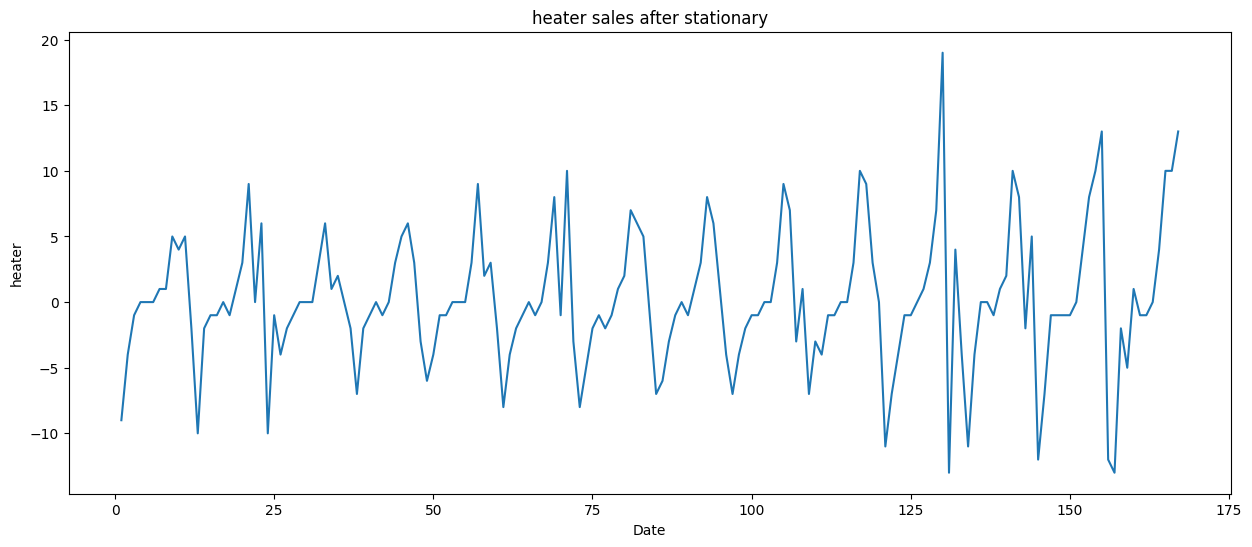

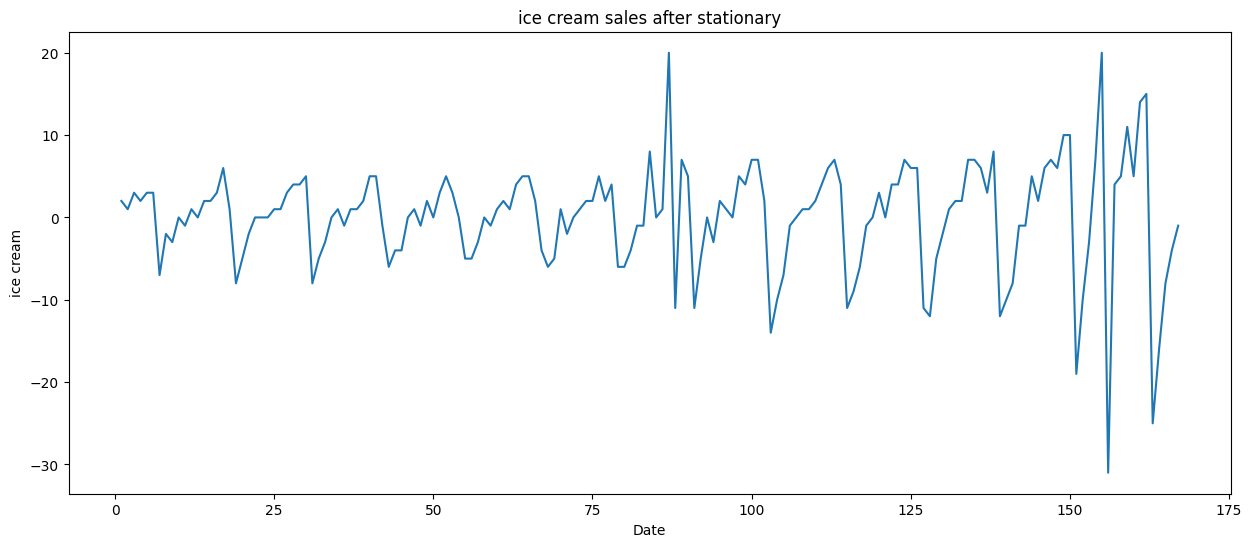

In [ ]:
for c in train_diff[['heater','ice cream']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} sales after stationary")
    plt.show()

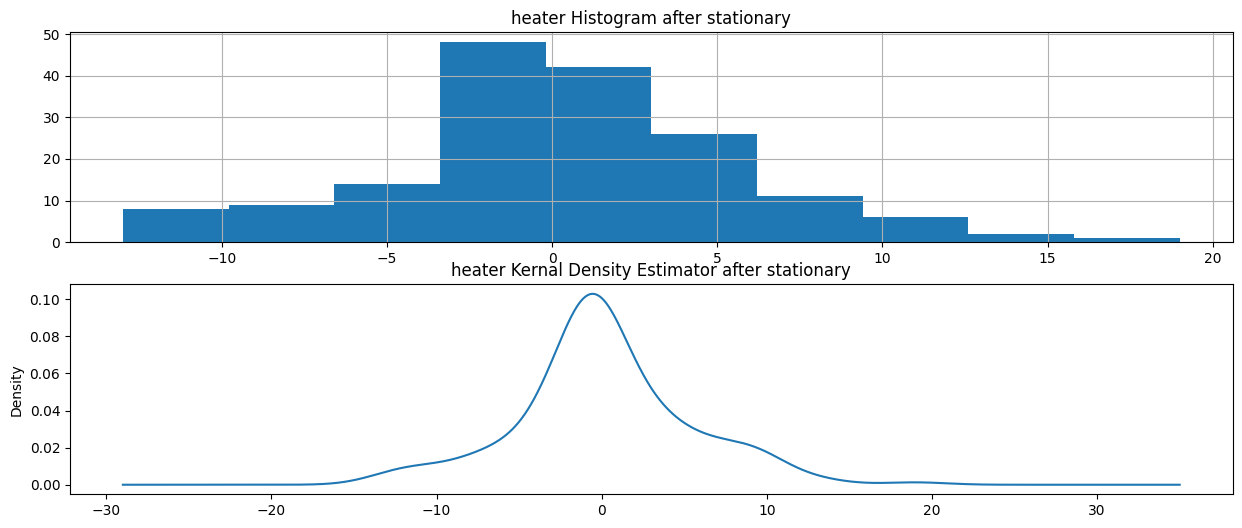

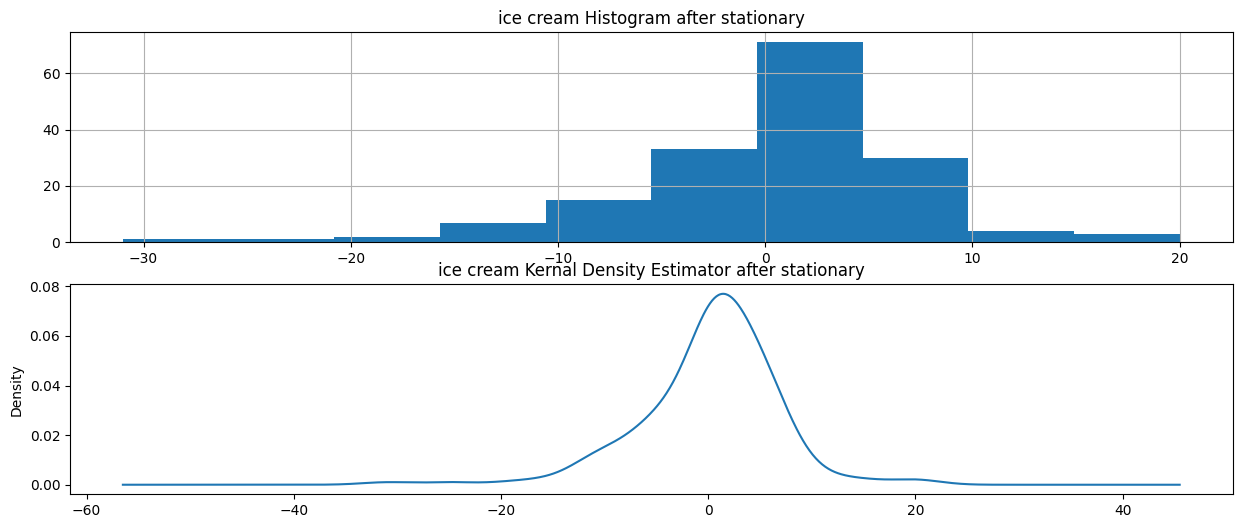

In [ ]:
for c in train_diff[['heater','ice cream']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
train_diff.head(10)

,heater,ice cream
1,-9.0,2.0
2,-4.0,1.0
3,-1.0,3.0
4,0.0,2.0
5,0.0,3.0
6,0.0,3.0
7,1.0,-7.0
8,1.0,-2.0
9,5.0,-3.0
10,4.0,0.0


A cointegration test is the co-movement among underlying variables over the long run.

Cointegration analysis aims to uncover causal relations among variables by determining if the stochastic trends in a group of variables are shared by the series. If these trends are shared, either one variable causes the other or they are both driven by a third variable.

Two or more variables are cointegrated if and only if they share common trends.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df):
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1 # Trace statistics
    cvts = res.cvt[:, d[str(1-0.05)]] #Critical values (90%, 95%, 99%) for trace statistic.
    def adjust(val, length= 6):
        return str(val).ljust(length) #string left justified (ljust)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(train_diff[['heater','ice cream']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
heater >  227.6     > 12.3212   =>   True
ice cream >  73.24     > 4.1296    =>   True


Fitting the VAR model for the AR term between 1 to 9 and choose the best AR component

In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  6.80014157598582, BIC: 6.91262306231196
Order : 2, AIC:  6.704832687622487, BIC: 6.8930718072528245
Order : 3, AIC:  6.522822282970299, BIC: 6.787445026808951
Order : 4, AIC:  6.0983540316297065, BIC: 6.4399951580991655
Order : 5, AIC:  5.777051820450966, BIC: 6.1963550264701786
Order : 6, AIC:  5.444994678191652, BIC: 5.942612774400322
Order : 7, AIC:  5.398655213741296, BIC: 5.975250304097639
Order : 8, AIC:  5.251406730862433, BIC: 5.907650396746005
Order : 9, AIC:  5.180967360998225, BIC: 5.917540849954078


To make data stationary, we used Pandas differencing after forecasting
the results. We need to inverse the result to the original scale. As we don’t
have a Pandas function for this, let’s define a custom function to inverse
Pandas differencing.

In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

Autoregressive AR(9) appears to be providing the least Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), so let’s fit and forecast.

In [ ]:
results = model.fit(4)
display(results.summary())
z = results.forecast(y=train_diff[['heater','ice cream' ]].values, steps=30)
df_pred = pd.DataFrame(z, columns=['heater','ice cream' ])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, Nov, 2023
Time:                     03:07:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.44000
Nobs:                     163.000    HQIC:                   6.23706
Log likelihood:          -941.590    FPE:                    445.225
AIC:                      6.09835    Det(Omega_mle):         399.850
--------------------------------------------------------------------
Results for equation heater
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.300479         0.285633            1.052           0.293
L1.heater            0.039606         0.072233            0.548           0.583
L1.ice cream        -0.248008         0.047581           -5.212

In [ ]:
df_pred["new_index"] = range(168, 198)
df_pred = df_pred.set_index("new_index")

In [ ]:
df_pred

,heater,ice cream
new_index,,
168,-0.715255,-3.134903
169,-3.859941,-3.846154
170,-4.870582,0.023020
171,-4.303161,4.489816
172,-0.282515,8.565086
173,-1.484585,5.020317
174,-1.461292,-0.009346
175,-0.165563,-3.326854
176,1.558638,-3.916893


Let’s inverse the differenced prediction, as shown below:

In [ ]:
res = inverse_diff(df[['heater','ice cream']],df_pred)

In [ ]:
res

,heater,ice cream,heater_1st_inv_diff,ice cream_1st_inv_diff
new_index,,,,
168,-0.715255,-3.134903,23.284745,70.865097
169,-3.859941,-3.846154,19.424804,67.018943
170,-4.870582,0.023020,14.554221,67.041963
171,-4.303161,4.489816,10.251060,71.531779
172,-0.282515,8.565086,9.968545,80.096864
173,-1.484585,5.020317,8.483961,85.117181
174,-1.461292,-0.009346,7.022669,85.107835
175,-0.165563,-3.326854,6.857106,81.780981
176,1.558638,-3.916893,8.415743,77.864088


In [ ]:
for i in ['heater','ice cream']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for heater
MSE is : 439.12527380399143
MAE is : 18.625516640906138
RMSE is : 20.955316122740584
MAPE is : 55.72504923106704
R2 is : -2.343593455360341

Evaluation metric for ice cream
MSE is : 783.7526737024581
MAE is : 24.889418800766315
RMSE is : 27.99558311059904
MAPE is : 56.022566543207176
R2 is : -1.5759118827773269



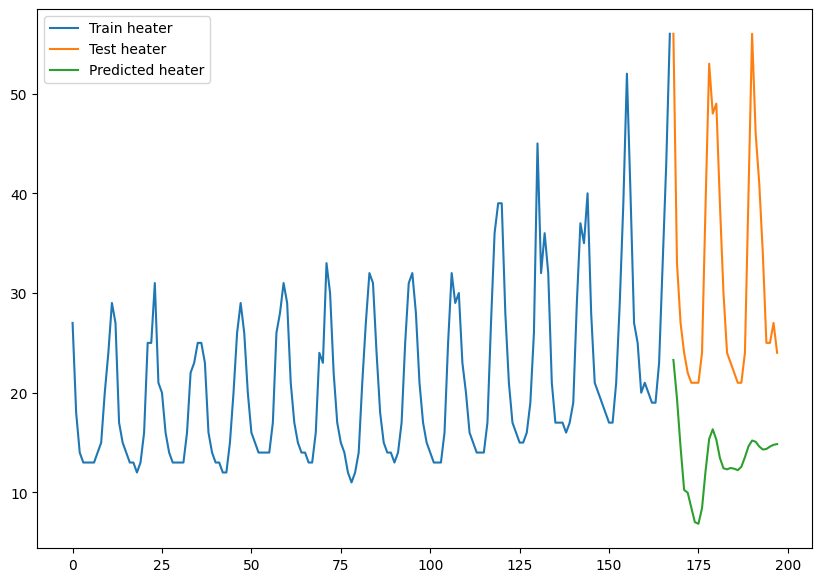

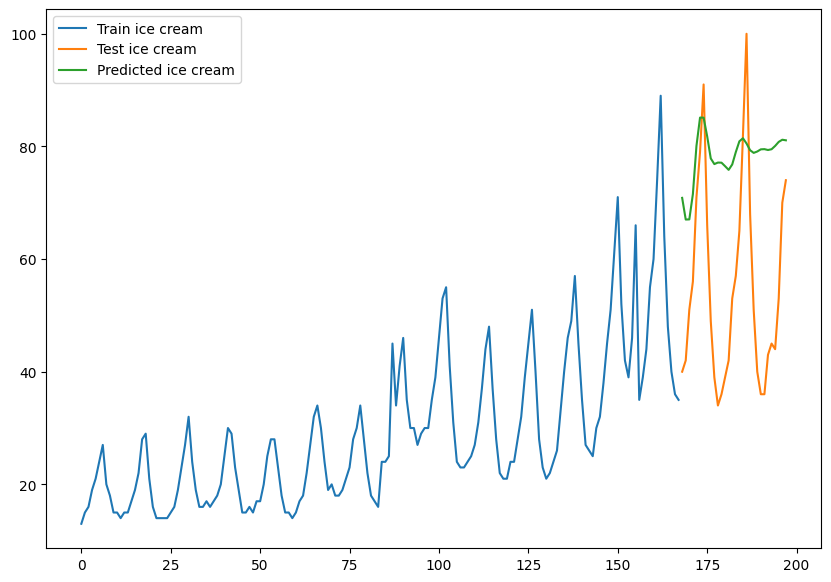

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['heater','ice cream']:

    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()